### Importación de datos



In [5]:
import pandas as pd

# URLs de los archivos
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Lista para almacenar los DataFrames
lista_tiendas = []

for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Tienda'] = f'Tienda_{i}'  # Identificador de origen
    lista_tiendas.append(df)

# Consolidación total
df_total = pd.concat(lista_tiendas, ignore_index=True)

# Limpieza básica: Asegurar que los nombres de columnas no tengan espacios
df_total.columns = df_total.columns.str.strip()

#1. Análisis de facturación



In [13]:
# 1. Facturación por Tienda
facturacion = df_total.groupby('Tienda')['Precio'].sum().reset_index()

/tmp/ipython-input-1412642591.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion, x='Tienda', y='Precio', palette='viridis')


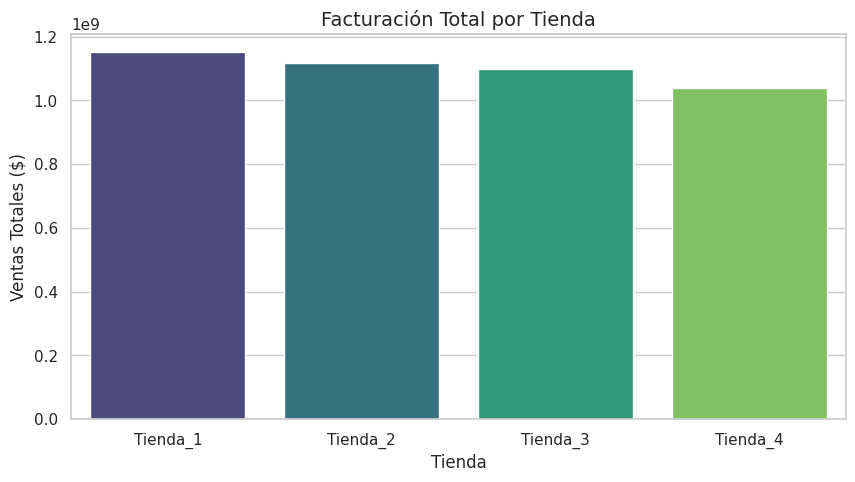

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Gráfico de Facturación por Tienda
plt.figure(figsize=(10, 5))
sns.barplot(data=facturacion, x='Tienda', y='Precio', palette='viridis')
plt.title('Facturación Total por Tienda', fontsize=14)
plt.ylabel('Ventas Totales ($)')
plt.show()

# 2. Ventas por categoría

In [10]:
# 2. Ventas por Categoría
ventas_cat = df_total.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

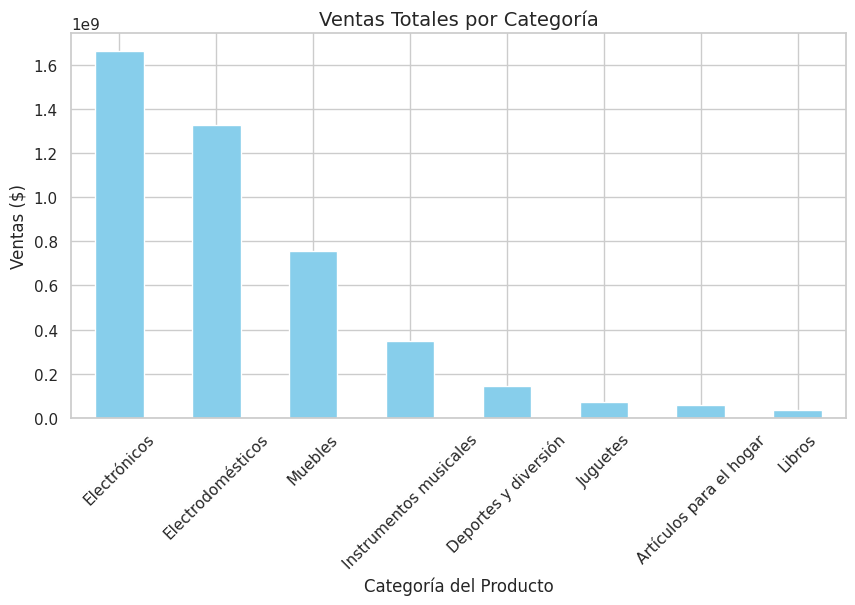

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Gráfico de Ventas por Categoría
plt.figure(figsize=(10, 5))
ventas_cat.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Categoría', fontsize=14)
plt.ylabel('Ventas ($)')
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [14]:
# 3. Calificación Promedio
calificacion = df_total.groupby('Tienda')['Calificación'].mean().reset_index()

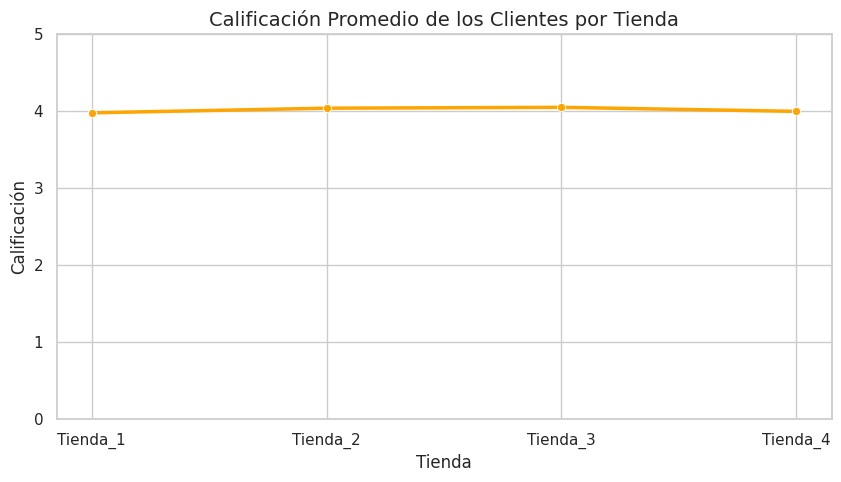

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 3. Gráfico de Calificación Promedio (Comparativo)
plt.figure(figsize=(10, 5))
sns.lineplot(data=calificacion, x='Tienda', y='Calificación', marker='o', color='orange', linewidth=2.5)
plt.title('Calificación Promedio de los Clientes por Tienda', fontsize=14)
plt.ylim(0, 5) # Escala de calificación usual
plt.show()

# 4. Productos más y menos vendidos

In [16]:
# 4. Productos más y menos vendidos (por cantidad de transacciones)
top_productos = df_total['Producto'].value_counts().head(5)
bottom_productos = df_total['Producto'].value_counts().tail(5)

/tmp/ipython-input-1923669002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.values, y=top_productos.index, ax=ax1, palette='Greens_r')
/tmp/ipython-input-1923669002.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_productos.values, y=bottom_productos.index, ax=ax2, palette='Reds_r')


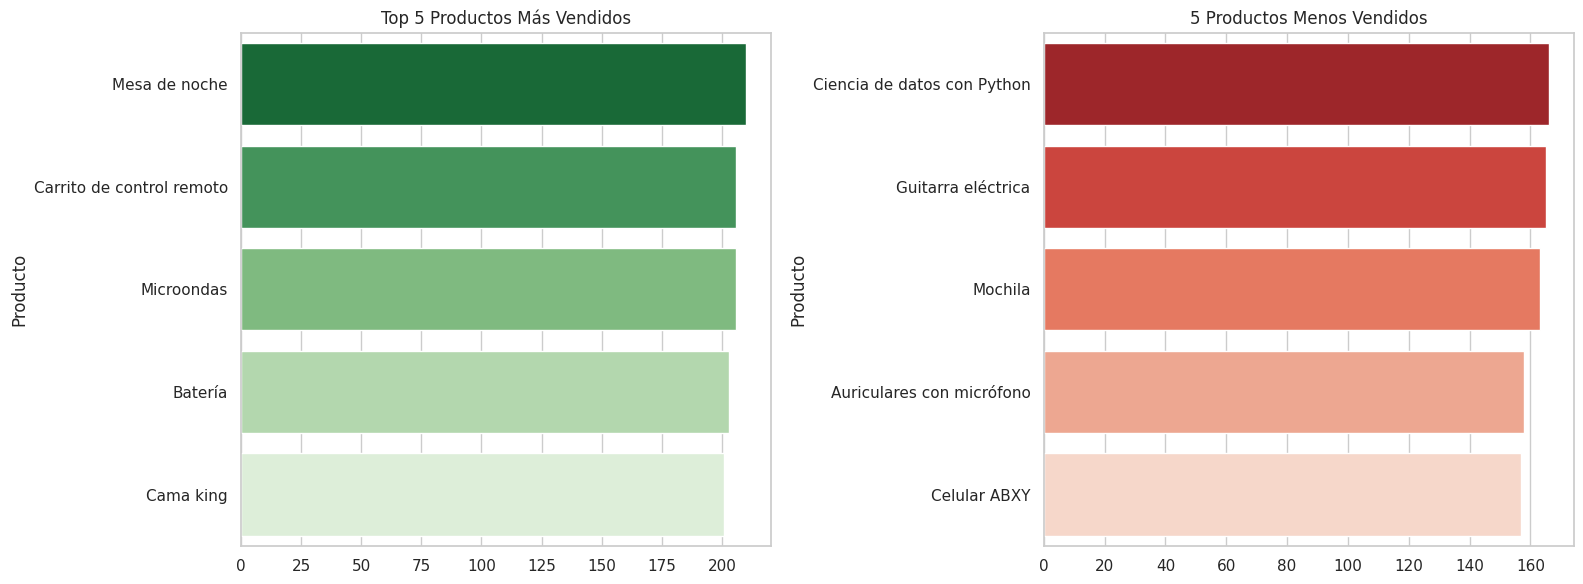

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 5. Productos Más y Menos Vendidos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 5
sns.barplot(x=top_productos.values, y=top_productos.index, ax=ax1, palette='Greens_r')
ax1.set_title('Top 5 Productos Más Vendidos')

# Bottom 5
sns.barplot(x=bottom_productos.values, y=bottom_productos.index, ax=ax2, palette='Reds_r')
ax2.set_title('5 Productos Menos Vendidos')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [21]:
# 4. Gasto de Envío y Tiempo de Entrega
envios = df_total.groupby('Tienda').agg({
    'Costo de envío': ['sum', 'mean']
}).reset_index()

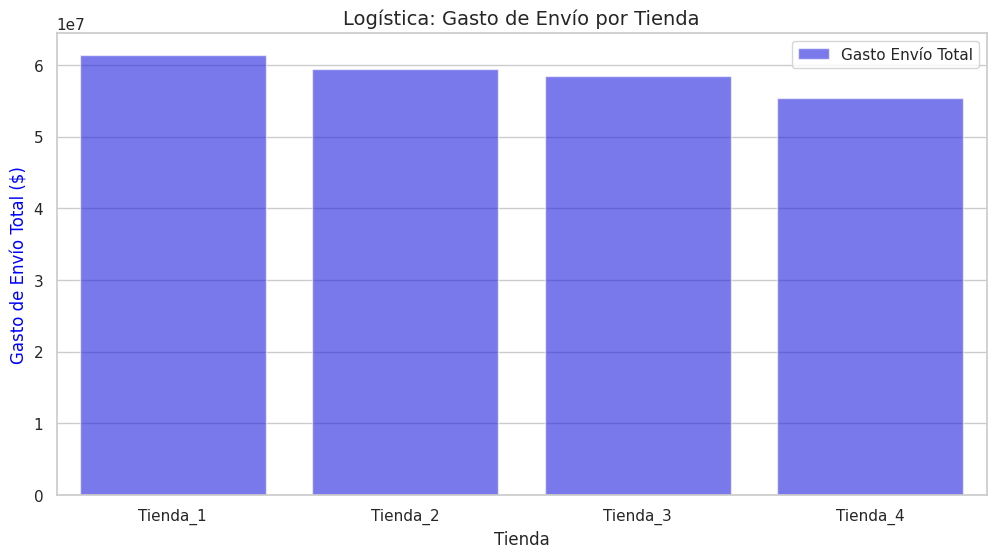

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 4. Gasto de Envío por Tienda
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para Costo de Envío
sns.barplot(data=envios, x='Tienda', y=('Costo de envío', 'sum'), ax=ax1, alpha=0.6, color='blue', label='Gasto Envío Total')
ax1.set_ylabel('Gasto de Envío Total ($)', color='blue')

plt.title('Logística: Gasto de Envío por Tienda', fontsize=14)
plt.show()

# 6. Relatorio: Cual es la tienda que menos rendimiento esta dando?

In [25]:
# Creación de un cuadro comparativo final
resumen = df_total.groupby('Tienda').agg({
    'Precio': 'sum',               # Facturación total
    'Costo de envío': 'sum',       # Gasto total envío
    'Calificación': 'mean'         # Satisfacción
}).rename(columns={'Precio': 'Facturacion_Total'})

# Calculamos el margen aproximado (Facturación - Costo Envío)
resumen['Rendimiento_Neto'] = resumen['Facturacion_Total'] - resumen['Costo de envío']

# Identificar la tienda con menor rendimiento neto
tienda_a_vender = resumen['Rendimiento_Neto'].idxmin()

print("--- RESUMEN ESTRATÉGICO ---")
print(resumen.sort_values(by='Rendimiento_Neto', ascending=False))
print(f"\n📢 RECOMENDACIÓN: La tienda que se debería vender es la **{tienda_a_vender}** debido a su bajo rendimiento neto.")

--- RESUMEN ESTRATÉGICO ---
          Facturacion_Total  Costo de envío  Calificación  Rendimiento_Neto
Tienda                                                                     
Tienda_1       1.150880e+09      61377900.0      3.976685      1.089502e+09
Tienda_2       1.116344e+09      59485100.0      4.037304      1.056858e+09
Tienda_3       1.098020e+09      58516600.0      4.048326      1.039503e+09
Tienda_4       1.038376e+09      55317400.0      3.995759      9.830583e+08

📢 RECOMENDACIÓN: La tienda que se debería vender es la **Tienda_4** debido a su bajo rendimiento neto.
